In [1]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


2024-01-04 10:59:07.185024: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-04 10:59:07.188035: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 10:59:07.227958: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 10:59:07.227976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 10:59:07.229481: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

**Feature pre-processing**
Abbiamo cercato di usare meano features possibile per evitare il rischio di eliminare una grande quantità di dati a causa della presenza di valori nulli. Questa strategia rende il nostro modello più estendibile ad altri dataset, dato che richiede meno features. Inoltre, la semplicità del modello facilita la sua interpretazione.

In [2]:
def get_neuralNetwork_dataset(input_dir: str, output_dir: str):
    input = pd.read_csv(input_dir)
    output = pd.read_csv(output_dir)
    df = pd.merge(input, output, left_index=True, right_index=True)

    selected_collumns = ['n_injured', 'n_arrested', 'n_unharmed', 'n_participants']

    df = df[selected_collumns + ['killed']]
    df.dropna(inplace=True)

    input = df[selected_collumns].values
    output = df['killed'].values

    # Normalizza i dati
    scaler = StandardScaler()
    input = scaler.fit_transform(input)
    
    return input, output

input, output = get_neuralNetwork_dataset('data/training/input.csv', 'data/training/output.csv')

In [3]:
def compute_classification_report(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_pred_bin = (y_pred > 0.5).astype(int)
    report = classification_report(y_val, y_pred_bin, output_dict=True)
    return pd.DataFrame(report).transpose()

**Cross-validation con k=5**

2024-01-04 10:59:09.613701: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/8
3196/3196 [==============================] - 5s 1ms/step - loss: 0.1492 - accuracy: 0.9511 - val_loss: 0.0446 - val_accuracy: 0.9908
Epoch 2/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0432 - accuracy: 0.9912 - val_loss: 0.0412 - val_accuracy: 0.9916
Epoch 3/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0393 - accuracy: 0.9915 - val_loss: 0.0371 - val_accuracy: 0.9915
Epoch 4/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0377 - accuracy: 0.9915 - val_loss: 0.0361 - val_accuracy: 0.9916
Epoch 5/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0371 - accuracy: 0.9916 - val_loss: 0.0366 - val_accuracy: 0.9915
Epoch 6/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0364 - accuracy: 0.9915 - val_loss: 0.0361 - val_accuracy: 0.9915
Epoch 7/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0361 - accuracy: 0.9916 - val_loss: 0.0360 - val_accuracy: 0.9914

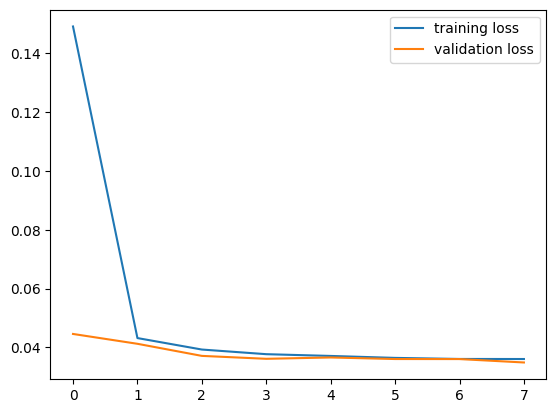

Epoch 1/8
3196/3196 [==============================] - 5s 1ms/step - loss: 0.1132 - accuracy: 0.9788 - val_loss: 0.0462 - val_accuracy: 0.9912
Epoch 2/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0428 - accuracy: 0.9913 - val_loss: 0.0416 - val_accuracy: 0.9909
Epoch 3/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0394 - accuracy: 0.9913 - val_loss: 0.0391 - val_accuracy: 0.9913
Epoch 4/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0378 - accuracy: 0.9915 - val_loss: 0.0376 - val_accuracy: 0.9913
Epoch 5/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0370 - accuracy: 0.9916 - val_loss: 0.0364 - val_accuracy: 0.9914
Epoch 6/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0363 - accuracy: 0.9916 - val_loss: 0.0363 - val_accuracy: 0.9913
Epoch 7/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0358 - accuracy: 0.9916 - val_loss: 0.0361 - val_accuracy: 0.9914

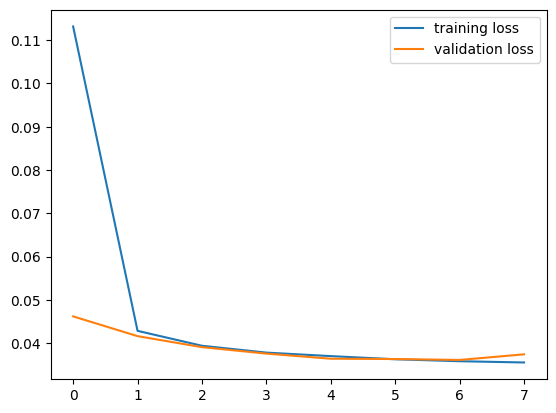

Epoch 1/8
3196/3196 [==============================] - 5s 1ms/step - loss: 0.1844 - accuracy: 0.9214 - val_loss: 0.0418 - val_accuracy: 0.9910
Epoch 2/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0391 - accuracy: 0.9912 - val_loss: 0.0382 - val_accuracy: 0.9916
Epoch 3/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0374 - accuracy: 0.9913 - val_loss: 0.0373 - val_accuracy: 0.9917
Epoch 4/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0365 - accuracy: 0.9914 - val_loss: 0.0371 - val_accuracy: 0.9917
Epoch 5/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0360 - accuracy: 0.9915 - val_loss: 0.0362 - val_accuracy: 0.9917
Epoch 6/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0355 - accuracy: 0.9915 - val_loss: 0.0359 - val_accuracy: 0.9917
Epoch 7/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0352 - accuracy: 0.9915 - val_loss: 0.0356 - val_accuracy: 0.9917

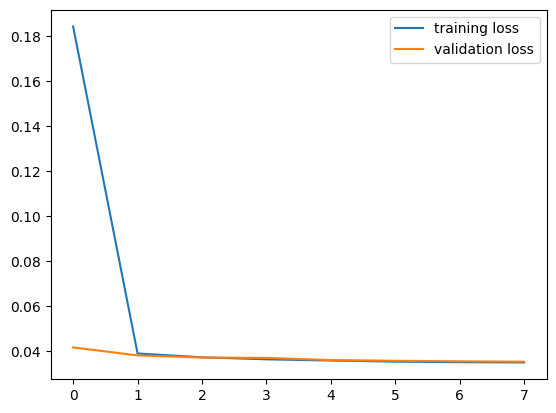

Epoch 1/8
3196/3196 [==============================] - 5s 1ms/step - loss: 0.1114 - accuracy: 0.9552 - val_loss: 0.0399 - val_accuracy: 0.9914
Epoch 2/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0377 - accuracy: 0.9916 - val_loss: 0.0381 - val_accuracy: 0.9915
Epoch 3/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0366 - accuracy: 0.9916 - val_loss: 0.0373 - val_accuracy: 0.9915
Epoch 4/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0361 - accuracy: 0.9916 - val_loss: 0.0378 - val_accuracy: 0.9911
Epoch 5/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0357 - accuracy: 0.9916 - val_loss: 0.0367 - val_accuracy: 0.9914
Epoch 6/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0355 - accuracy: 0.9916 - val_loss: 0.0362 - val_accuracy: 0.9915
Epoch 7/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0353 - accuracy: 0.9916 - val_loss: 0.0363 - val_accuracy: 0.9914

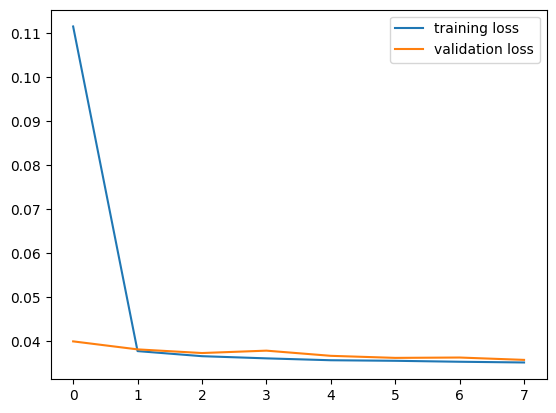

Epoch 1/8
3196/3196 [==============================] - 5s 1ms/step - loss: 0.1337 - accuracy: 0.9596 - val_loss: 0.0402 - val_accuracy: 0.9915
Epoch 2/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0422 - accuracy: 0.9912 - val_loss: 0.0389 - val_accuracy: 0.9915
Epoch 3/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0410 - accuracy: 0.9913 - val_loss: 0.0381 - val_accuracy: 0.9916
Epoch 4/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0393 - accuracy: 0.9914 - val_loss: 0.0367 - val_accuracy: 0.9916
Epoch 5/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0373 - accuracy: 0.9915 - val_loss: 0.0354 - val_accuracy: 0.9917
Epoch 6/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0360 - accuracy: 0.9914 - val_loss: 0.0347 - val_accuracy: 0.9917
Epoch 7/8
3196/3196 [==============================] - 4s 1ms/step - loss: 0.0356 - accuracy: 0.9915 - val_loss: 0.0347 - val_accuracy: 0.9917

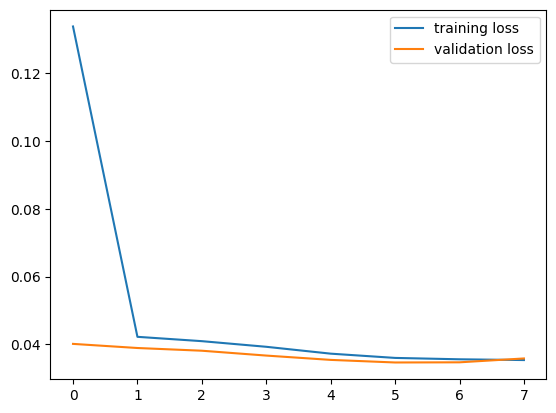

In [4]:
kf = KFold(n_splits=5)  # Definisci il numero di fold qui
fold_no = 1

history_list = []
report_df_list = []
for train, validation in kf.split(input, output):
    model = Sequential()
    model.add(Dense(8, input_dim=input.shape[1], activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(input[train], output[train], epochs=8, batch_size=32, verbose=1,
                        validation_data=(input[validation], output[validation]))
    history_list.append(history)
    
    report_df = compute_classification_report(model, input[validation], output[validation])
    report_df_list.append(report_df)

    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.legend()
    plt.show()

    fold_no = fold_no + 1

**Bias-Variance plot training e validation**

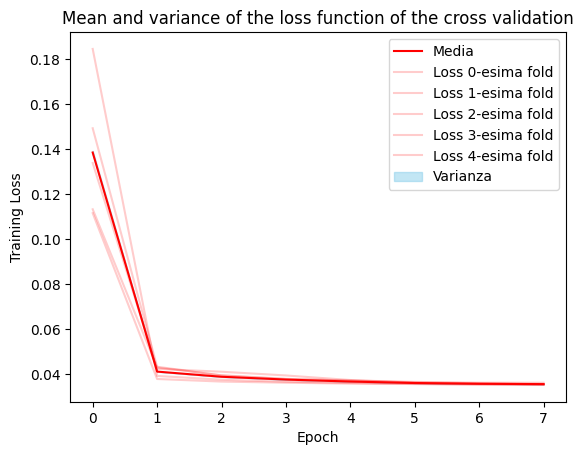

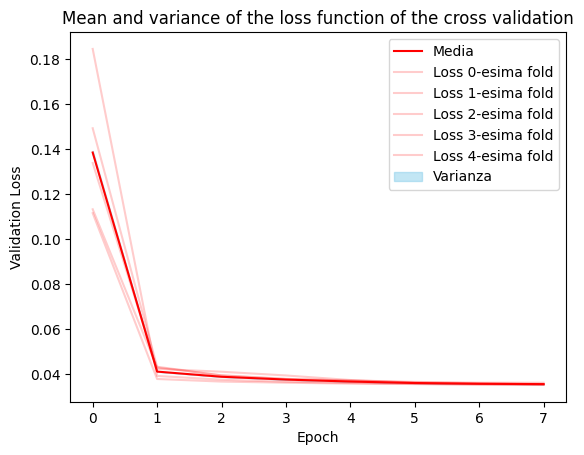

In [5]:
def plot_history(cross_validation_loss, ylabel: str):
    
    
    mean = np.mean(cross_validation_loss, axis=0)
    variance = np.var(cross_validation_loss, axis=0)

    # Calcola l'intervallo di confidenza (media +- varianza)
    upper_bound = mean + variance
    lower_bound = mean - variance

    # Crea una nuova figura
    plt.figure()

    # Grafico della media
    plt.plot(mean, label='Media', color='red')
    for i in range(len(cross_validation_loss)):
        plt.plot(cross_validation_loss[i], color='red', alpha=0.2, label=f'Loss {i}-esima fold')
    plt.fill_between(range(len(mean)), lower_bound, upper_bound, color='skyblue', alpha=0.5, label='Varianza')
    plt.title('Mean and variance of the loss function of the cross validation')
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    
history_loss = np.array([history.history['loss'] for history in history_list])
plot_history(history_loss, 'Training Loss')

history_loss_variance = np.array([history.history['val_loss'] for history in history_list])
plot_history(history_loss, 'Validation Loss')

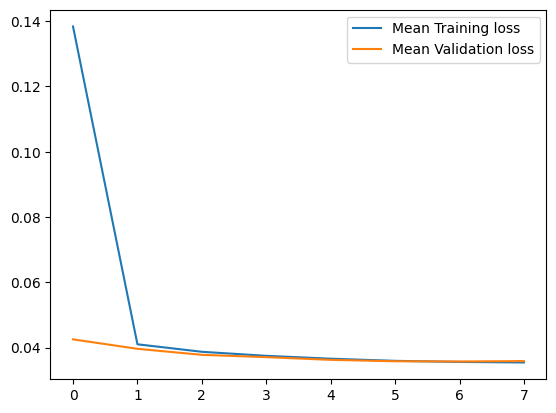

In [6]:
mean_training = np.mean(history_loss, axis=0)
mean_validation = np.mean(history_loss_variance, axis=0)
plt.plot(mean_training, label='Mean Training loss')
plt.plot(mean_validation, label='Mean Validation loss')
plt.legend()
plt.show()

**classification_report**

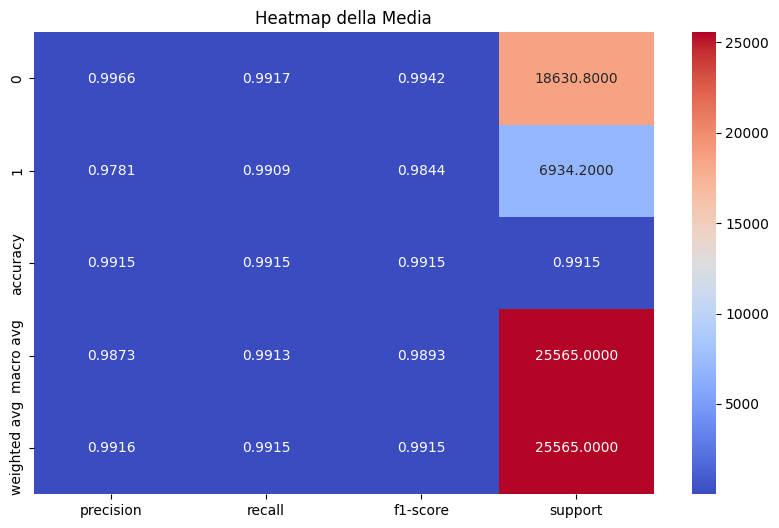

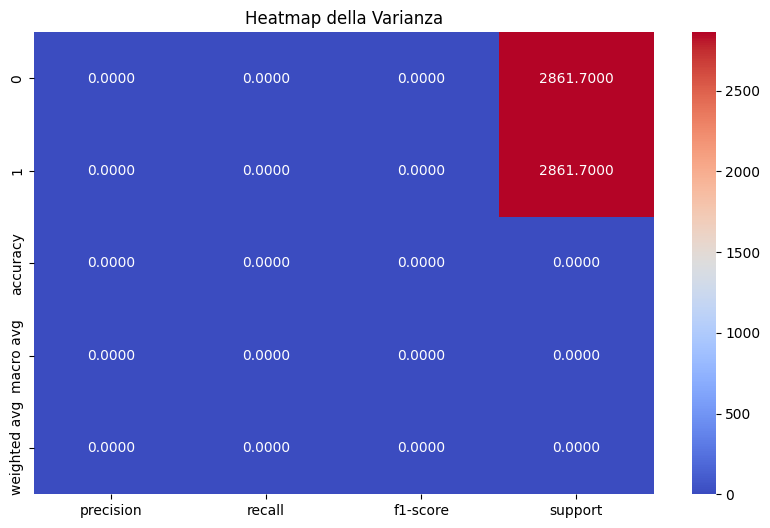

In [7]:
mean_df = pd.concat(report_df_list).groupby(level=0).mean()
variance_df = pd.concat(report_df_list).groupby(level=0).var()

# Crea una nuova figura per la media
plt.figure(figsize=(10, 6))
sns.heatmap(mean_df, annot=True, cmap='coolwarm', fmt = '.4f')
plt.title('Heatmap della Media')
plt.show()

# Crea una nuova figura per la varianza
plt.figure(figsize=(10, 6))
sns.heatmap(variance_df, annot=True, cmap='coolwarm', fmt = '.4f')
plt.title('Heatmap della Varianza')
plt.show()


Il modello ottiene già risultati quasi ottimali => non ha senso calcolare la ROC Cruve

**Training del miglior modello individuato su tutto il dataset e testing**

In [8]:
input, output = get_neuralNetwork_dataset('data/training/input.csv', 'data/training/output.csv')
input_test, output_test = get_neuralNetwork_dataset('data/testing/input.csv', 'data/testing/output.csv')

Epoch 1/10
3995/3995 [==============================] - 6s 1ms/step - loss: 0.1390 - accuracy: 0.9599 - val_loss: 0.0548 - val_accuracy: 0.9907
Epoch 2/10
3995/3995 [==============================] - 5s 1ms/step - loss: 0.0431 - accuracy: 0.9915 - val_loss: 0.0430 - val_accuracy: 0.9907
Epoch 3/10
3995/3995 [==============================] - 5s 1ms/step - loss: 0.0386 - accuracy: 0.9915 - val_loss: 0.0417 - val_accuracy: 0.9906
Epoch 4/10
3995/3995 [==============================] - 5s 1ms/step - loss: 0.0378 - accuracy: 0.9915 - val_loss: 0.0417 - val_accuracy: 0.9906
Epoch 5/10
3995/3995 [==============================] - 5s 1ms/step - loss: 0.0374 - accuracy: 0.9915 - val_loss: 0.0412 - val_accuracy: 0.9906
Epoch 6/10
3995/3995 [==============================] - 5s 1ms/step - loss: 0.0374 - accuracy: 0.9915 - val_loss: 0.0411 - val_accuracy: 0.9906
Epoch 7/10
3995/3995 [==============================] - 5s 1ms/step - loss: 0.0372 - accuracy: 0.9915 - val_loss: 0.0413 - val_accuracy:

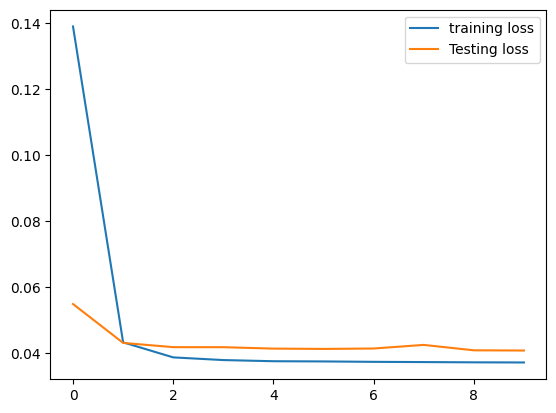

In [9]:
model = Sequential()
model.add(Dense(8, input_dim=input.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input, output, epochs=10, batch_size=32, verbose=1, validation_data=(input_test, output_test))

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='Testing loss')
plt.legend()
plt.show()

In [10]:
compute_classification_report(model, input_test, output_test)

  1/999 [..............................] - ETA: 54s

999/999 [==============================] - 1s 710us/step


,precision,recall,f1-score,support
0,0.995990,0.991247,0.993613,23305.000000
1,0.976731,0.989256,0.982954,8656.000000
accuracy,0.990707,0.990707,0.990707,0.990707
macro avg,0.986361,0.990251,0.988283,31961.000000
weighted avg,0.990774,0.990707,0.990726,31961.000000


In [11]:
print(confusion_matrix(output_test, model.predict(input_test) > 0.5))
print("---------------------------------------")
print(confusion_matrix(output_test, model.predict(input_test) > 0.5)/len(output_test)*100)

  1/999 [..............................] - ETA: 19s

999/999 [==============================] - 1s 684us/step
[[23101   204]
 [   93  8563]]
---------------------------------------
999/999 [==============================] - 1s 686us/step
[[72.27871468  0.6382779 ]
 [ 0.29097963 26.79202778]]


In [12]:
(204)/(23101+204+92+8564)*100

0.6382779011920778